In [5]:
import os
import itertools

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker
import matplotlib.pyplot as plt

In [6]:
import config

In [7]:

pal = sns.color_palette(['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', '#BBBBBB'])
sns.set_palette(pal)

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['figure.figsize'] = (4.5,1.5)
mpl.rcParams['figure.dpi'] = 100

In [8]:
df = pd.read_csv("results.csv")

In [9]:
# shorten the working set a bit
df = df[df["t"] < 3600]

In [10]:
# let's make a nicer graph
shells = {x["name"]: x for x in config.SHELLS}
df["Shell"] = df["shell"].apply(lambda x: f"{shells[x]['planes']}/{shells[x]['sats']}/{shells[x]['altitude']}km/{shells[x]['inc']}°")

df["Altitude"] = (df["height"])/1000 - max(config.EARTH_RADIUS_EQUATORIAL, config.EARTH_RADIUS_POLAR)


[Text(0.5, 0, 'Minimum ISL Altitude (km)')]

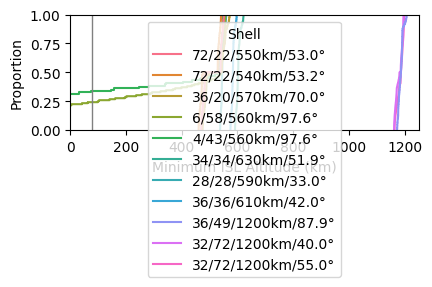

In [11]:
df_graph = df[df["t"] == 1]

g = sns.ecdfplot(data=df_graph, x="Altitude", hue="Shell")
# g.legend(loc='upper right', ncol=2)
# g.get_legend().set_title(None)
g.set(xlim=[0,1250])
g.axvline(x=80, color="grey", linestyle='-', linewidth=1)
g.set(xlabel="Minimum ISL Altitude (km)")
# g.xaxis.set_major_formatter(matplotlib.ticker.EngFormatter())
# g.get_figure().savefig("../graphs/profile-full.pdf", bbox_inches="tight")

In [30]:
df_graph = df[df["t"] < 3600]
df_graph = df_graph[(df_graph["shell"] == "st1") | (df_graph["shell"] == "st4")]

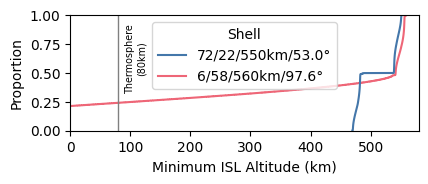

In [35]:
# df_graph = df[df["t"] == 1]

g = sns.ecdfplot(data=df_graph, x="Altitude", hue="Shell")
g.set(xlim=[0,580])
g.get_legend().set_title("Shell")
sns.move_legend(g, "upper center")
g.axvline(x=80, color="grey", linestyle='-', linewidth=1)
g.text(110, 0.63, "Thermosphere\n(80km)", horizontalalignment='center', verticalalignment='center', rotation='vertical', fontsize="x-small")
g.set(xlabel="Minimum ISL Altitude (km)")
# g.xaxis.set_major_formatter(matplotlib.ticker.EngFormatter())
g.get_figure().savefig("./isl_altitudes.pdf", bbox_inches="tight")

In [28]:
df_graph = df[df["t"] < 1]
df_graph["Constellation"] = df_graph["shell"].apply(lambda x: "Starlink" if x.startswith("st") else "Kuiper" if x.startswith("ku") else "OneWeb")

/var/folders/2f/b2y6thfs2051_m0fs57vb_sc0000gn/T/ipykernel_24217/2625807469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_graph["Constellation"] = df_graph["shell"].apply(lambda x: "Starlink" if x.startswith("st") else "Kuiper" if x.startswith("ku") else "OneWeb")


AttributeError: 'NoneType' object has no attribute 'set_title'

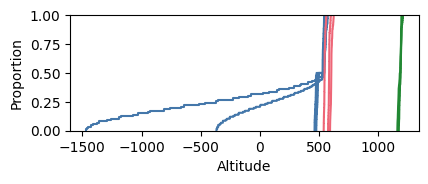

In [29]:
g = sns.ecdfplot(data=df_graph[df_graph["Constellation"] == "Starlink"], x="Altitude", hue="shell", palette=["#4477AA"] * 5, legend=False)
sns.ecdfplot(ax=g, data=df_graph[df_graph["Constellation"] == "Kuiper"], x="Altitude", hue="shell", palette=["#EE6677"] * 3, legend=False)
sns.ecdfplot(ax=g, data=df_graph[df_graph["Constellation"] == "OneWeb"], x="Altitude", hue="shell", palette=["#228833"] * 3, legend=False)

g.get_legend().set_title("Constellation")